In [1]:
#IMPORTING LIBRARIES
import pandas as pd   #data manipulation, cleaning and analysiS
import numpy as np   #computations by numbers and working with arrays.
import seaborn as sns  #for heatmap and boxplot
import matplotlib.pyplot as plt  #for graphs
from sklearn.model_selection import train_test_split  #for machine learning models
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Loading dataset
file_path = "heart.csv" 
df = pd.read_csv(file_path)

In [3]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [4]:
# Display dataset
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.

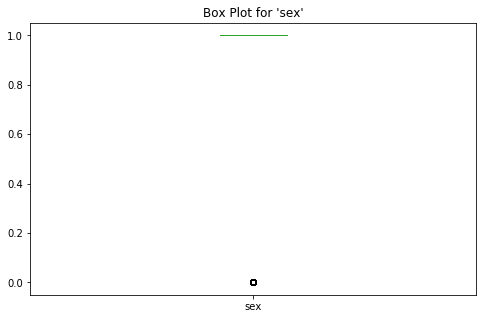

In [5]:
import matplotlib.pyplot as plt

# Box plot example
plt.figure(figsize=(8, 5))
df['sex'].plot(kind='box')
plt.title("Box Plot for 'sex'")
plt.show()

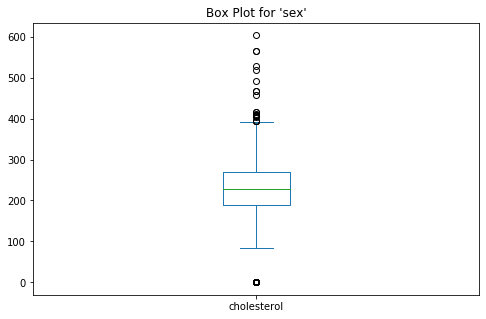

In [6]:
import matplotlib.pyplot as plt

# Box plot example
plt.figure(figsize=(8, 5))
df['cholesterol'].plot(kind='box')
plt.title("Box Plot for 'sex'")
plt.show()

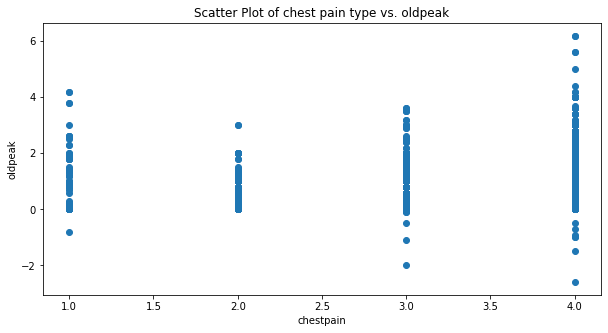

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(df['chest pain type'], df['oldpeak'])
plt.title("Scatter Plot of chest pain type vs. oldpeak")
plt.xlabel('chestpain')
plt.ylabel('oldpeak')
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max Scaling only to numeric columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("Normalized Data:\n", df)

Normalized Data:
            age  sex  chest pain type  resting bp s  cholesterol  \
0     0.244898  1.0         0.333333          0.70     0.479270   
1     0.428571  0.0         0.666667          0.80     0.298507   
2     0.183673  1.0         0.333333          0.65     0.469320   
3     0.408163  0.0         1.000000          0.69     0.354892   
4     0.530612  1.0         0.666667          0.75     0.323383   
...        ...  ...              ...           ...          ...   
1185  0.346939  1.0         0.000000          0.55     0.437811   
1186  0.816327  1.0         1.000000          0.72     0.320066   
1187  0.591837  1.0         1.000000          0.65     0.217247   
1188  0.591837  0.0         0.333333          0.65     0.391376   
1189  0.204082  1.0         0.666667          0.69     0.290216   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                     0.0          0.0        0.788732              0.0   
1                     0.0  

In [11]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

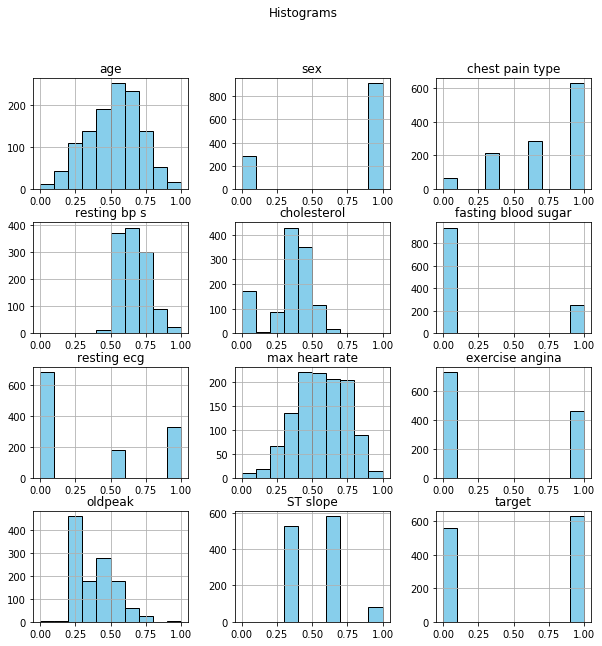

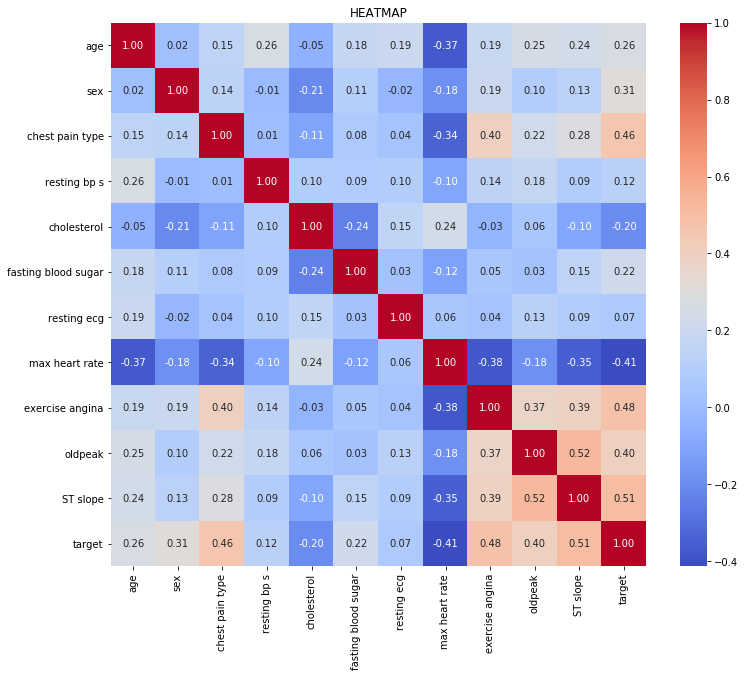

In [13]:
# Plot histogram for each numerical feature
df.hist(bins=10, figsize=(10, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms")
plt.show()

#heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("HEATMAP")
plt.show()

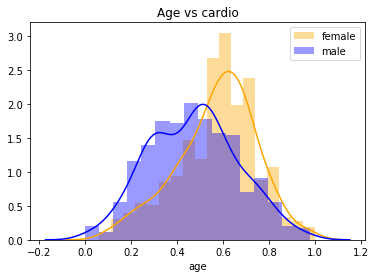

In [17]:
sns.distplot(df[df['target'] == 1]['age'], kde=True, color='orange', label='female')
sns.distplot(df[df['target'] == 0]['age'], kde=True, color='blue', label='male')
plt.legend()
plt.title('Age vs cardio')
plt.show()

In [21]:
df = pd.get_dummies(df, drop_first=True)
scaler = StandardScaler()
df[['age', 'sex', 'fasting blood sugar']] = scaler.fit_transform(df[['age', 'sex', 'fasting blood sugar']])
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")

Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       107
         1.0       0.87      0.86      0.87       131

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238

Accuracy: 0.85


In [23]:
# Random Forest Model with Controlled Complexity
rf_model = RandomForestClassifier(
    n_estimators=100,  # Limit the number of trees
    max_depth=10,      # Restrict the depth of trees
    min_samples_split=10,  # Minimum samples to split a node
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest Performance:
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       107
         1.0       0.92      0.96      0.94       131

    accuracy                           0.93       238
   macro avg       0.94      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238

Accuracy: 0.93


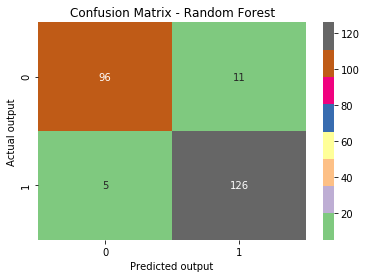

In [24]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Accent')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted output")
plt.ylabel("Actual output")
plt.show()

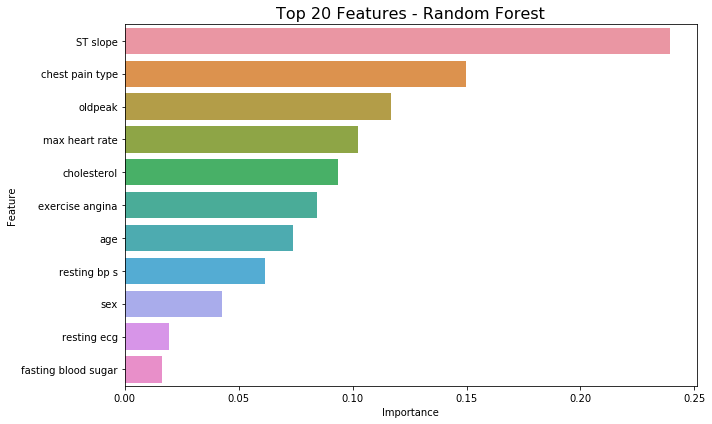

In [25]:
# Feature Importance
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_n = 20  # Show top 20 features
importance_df = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title(f"Top {top_n} Features - Random Forest", fontsize=16)
plt.tight_layout()
plt.show()